In [1]:
%matplotlib inline
import mxnet
import d2lzh as d2l
from mxnet import autograd,gluon,nd
from mxnet.gluon import data as gdata,loss as gloss,nn

In [2]:
# 生成数据集
n_train,n_test,true_w,true_b=100,100,[1.2,-3.4,5.6],5
features=nd.random.normal(shape=(n_train+n_test,1))
# concat默认dim=1，按列连结两个矩阵
ploy_features=nd.concat(features,nd.power(features,2),nd.power(features,3))
labels =(true_w[0]*ploy_features[:,0]+true_w[1]*ploy_features[:,1])+true_w[2]*ploy_features[:,2]+true_b
labels +=nd.random.normal(scale=0.1,shape=labels.shape)

In [3]:
features[:2],ploy_features[:2],labels[:2]

(
 [[1.1630785]
  [0.4838046]]
 <NDArray 2x1 @cpu(0)>,
 
 [[1.1630785  1.3527517  1.5733565 ]
  [0.4838046  0.2340669  0.11324265]]
 <NDArray 2x3 @cpu(0)>,
 
 [10.591171   5.5986414]
 <NDArray 2 @cpu(0)>)

In [4]:
# 定义、训练和测试模型 
# 定义作图函数，以x和logy画图
# 本函数已保存在d2lzh包中⽅便以后使⽤
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend=None,figsize=(3.5,2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals,y_vals)# 第一条曲线以线(默认)的形式画
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals,y2_vals,linestyle=':')# 第二条曲线以点的形式画
        d2l.plt.legend(legend)# 放置图例

In [5]:
num_epochs,loss=100,gloss.L2Loss()

def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net=nn.Sequential()
    net.add(nn.Dense(1))
    # 权重w实际的初始化发生在第一个正向传播过程中
    net.initialize()# 默认初始化权重参数w为[-0.7,0.7]的范围,偏差b默认
    batch_size=min(10,train_labels.shape[0])
    # ArrayDataset将features和labels组合在一起，形成dataset。
    # DataLoader从dataset中随机(shuffle)读取batch_size大小的小批量样本
    train_iter=gdata.DataLoader(gdata.ArrayDataset(train_features,train_labels),batch_size,shuffle=True)
    # Trainer用'sgd'算法优化参数集合,net.collect_params()收集所有参数
    trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.01})
    train_ls,test_ls=[],[]
    for _ in range(num_epochs):# _ 忽略参数
        for X,y in train_iter:
            with autograd.record():
                l=loss(net(X),y) # 权重w实际的初始化发生在第一个正向传播过程中
            l.backward()
            trainer.step(batch_size)
        train_ls.append( loss(net(train_features),train_labels).mean().asscalar() )
        test_ls.append( loss(net(test_features),test_labels).mean().asscalar() )
    print('final epoch：train loss',train_ls[-1],'test loss',test_ls[-1])
    semilogy(range(1,num_epochs+1),train_ls,'epoch','loss',
             range(1,num_epochs+1),test_ls,['train','test'])
    print('weight：',net[0].weight.data().asnumpy(),
         '\nbias：',net[0].bias.data().asnumpy())

final epoch：train loss 0.0048411204 test loss 0.0048956894
weight： [[ 1.2084678 -3.4000225  5.5991683]] 
bias： [5.0029764]


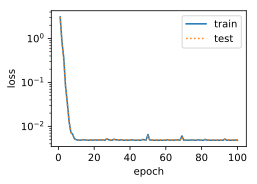

In [6]:
# 三阶多项式函数拟合（正常） 
fit_and_plot(ploy_features[:n_train,:],ploy_features[n_train:,:],labels[:n_train],labels[n_train:])

final epoch：train loss 145.67406 test loss 89.854385
weight： [[19.735529]] 
bias： [1.9867569]


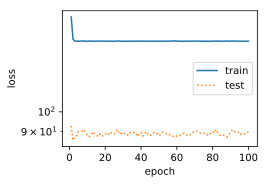

In [7]:
# 线性函数拟合（⽋拟合）训练误差过高
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train],labels[n_train:])

final epoch：train loss 0.5151467 test loss 100.17587
weight： [[2.0318103 1.9377495 2.0937972]] 
bias： [2.5020804]


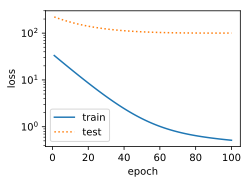

In [8]:
# 训练样本不⾜（过拟合）测试误差过高
fit_and_plot(ploy_features[:2,:],ploy_features[n_train:,:],labels[:2],labels[n_train:])

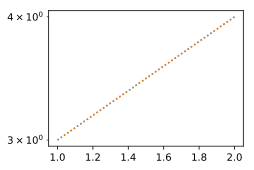

In [9]:
x=nd.array([[1,1],[2,2]])
y=nd.array([[3,3],[4,4]])
z=nd.array([[5,5],[6,6]])

nd.power(x,3)
nd.concat(x,y,z,dim=0)
d2l.plt.semilogy(x.asnumpy(),y.asnumpy(),linestyle=':')